<a href="https://colab.research.google.com/github/Carolinenmurithi/Carolinenmurithi.github.io/blob/main/Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caroline Murithi
CS-DA02-25052
Assignment 7

In [1]:
# Import the required Dataset
from google.colab import files
uploaded = files.upload()

Saving areas.csv to areas.csv
Saving homeprices.csv to homeprices.csv


In [2]:
# Confirm files saved
import os
print(os.listdir('.'))

['.config', 'areas.csv', 'homeprices.csv', 'sample_data']


In [5]:
# Load the dataset into dataframe
import pandas as pd
df = pd.read_csv('homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [6]:
# Inspect Structure
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


,0
area,0
price,0


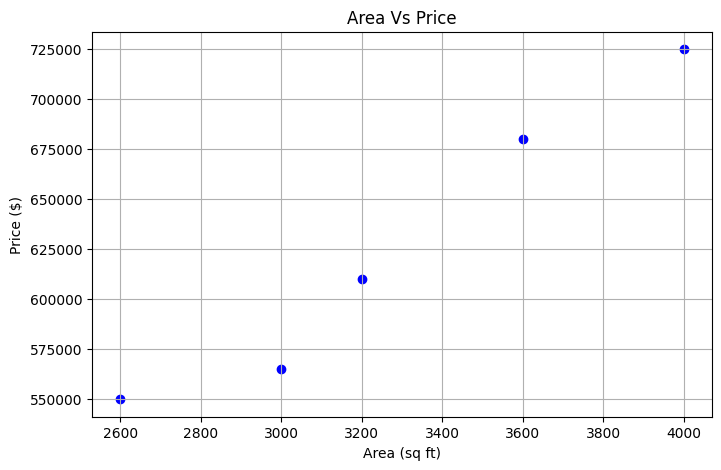

In [9]:
# Visualize Data >> Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(df['area'], df['price'], marker='o', color='blue')
plt.title('Area Vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

In [10]:
# Prepare features (X) and target (y)
X = df[['area']]
y = df['price']


In [11]:
# Split the data (80% for training, 20% for testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 4
Testing samples: 1


In [14]:
# Create and train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [15]:
# Display model parameters
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_)


Intercept (b0): 211542.05607476638
Slope (b1): [128.27102804]


In [16]:
# Predict prices for the test data
y_pred = model.predict(X_test)

print("Predictions on test data:\n", y_pred)

Predictions on test data:
 [596355.14018692]


In [17]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Model Evaluation Results:
Mean Absolute Error: 31355.140186915873
Mean Squared Error: 983144816.1411468
Root Mean Squared Error: 31355.140186915873
R² Score: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


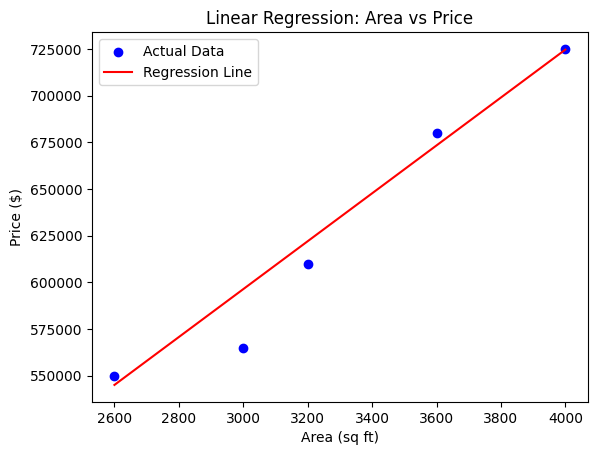

In [18]:
# Plot regression line with actual data
plt.scatter(df['area'], df['price'], color='blue', label='Actual Data')
plt.plot(df['area'], model.predict(df[['area']]), color='red', label='Regression Line')
plt.title('Linear Regression: Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [19]:
# Example prediction for a 3000 sq ft house
new_area = 3000
predicted_price = model.predict([[new_area]])
print(f"Predicted price for {new_area} sq ft area: ${predicted_price[0]:,.2f}")

Predicted price for 3000 sq ft area: $596,355.14


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
